**<h2>Mask R-CNN</h2>**

**Imports**

In [6]:
import os
import sys
import random
import cv2
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath("./")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))  # To find local version
import coco

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

**Config**

In [7]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

**Create Model**

In [8]:
import tensorflow as tf
import keras
import h5py
print(tf.__version__)
print(keras.__version__)
print(h5py.__version__)

1.3.0
2.0.8
2.10.0


In [9]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)

**Class Names**

In [10]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

**Object Detection**

Processing 1 images
image                    shape: (720, 1280, 3)        min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1280.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


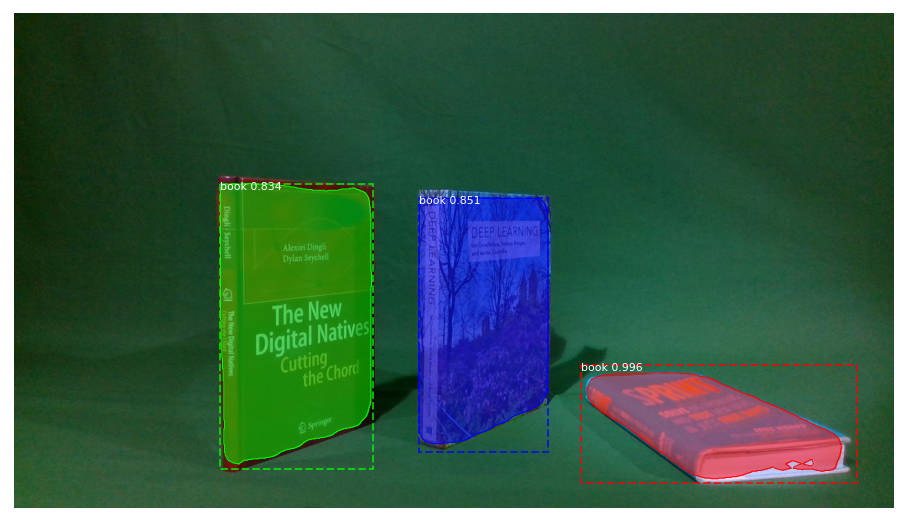

In [11]:
# Load a random image from the images folder
file_names = next(os.walk(IMAGE_DIR))[2]
image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

**Display Masks**

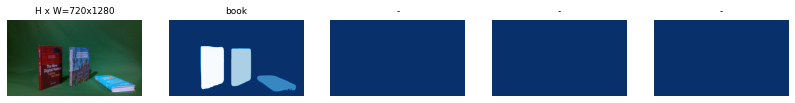

In [12]:
visualize.display_top_masks(image, r['masks'], r['class_ids'], 
                            class_names)

In [13]:
masks = {}

for i in range(len(results[0]['class_ids'])):
    masks[i] = {}
    masks[i]['mask'] = np.array(results[0]['masks'][:, :, i], dtype=np.uint8) * 255

In [14]:
masks

{0: {'mask': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)},
 1: {'mask': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)},
 2: {'mask': array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}}

In [15]:
all_masks = np.zeros((image.shape[0], image.shape[1]), dtype=np.uint8)

for i in range(len(results[0]['class_ids'])):
    all_masks += masks[i]['mask']

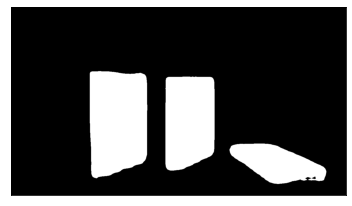

In [16]:
plt.imshow(all_masks, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

**<h2>SaRa</h2>**

In [17]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import saraRC1 as sara

In [18]:
seg_dim = 8

In [19]:
def plot_heatmap(im, grid_size, name=None):
    '''
    Given an image im, this function plots the heatmap generated by SaRa for the given grid size.
    '''

    heatmap, _ = sara.return_sara(im.copy(), grid_size)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)

    plt.figure(name + ' SaRa Output - Grid Size ' +
               str(grid_size) + ' x ' + str(grid_size))
    plt.gcf().set_size_inches(12, 6)
    plt.imshow(heatmap)
    plt.xticks([])
    plt.yticks([])
    plt.title('SaRa Output - Grid Size ' +
              str(grid_size) + ' x ' + str(grid_size))

In [20]:
s1 = cv2.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))
heatmap, sara_list = sara.return_sara(s1.copy(), 8)

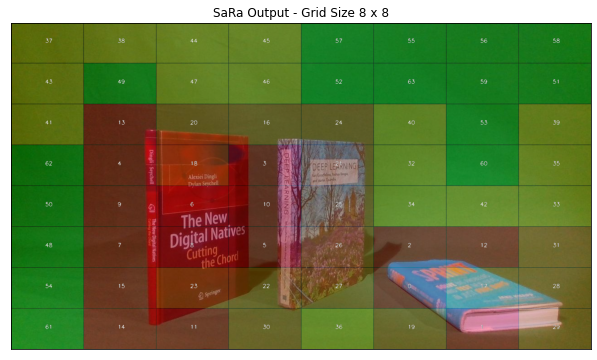

In [21]:
plot_heatmap(s1, seg_dim, 'Original')

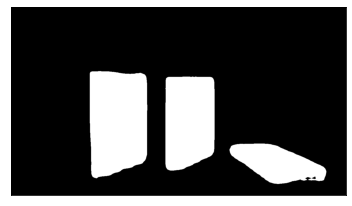

In [22]:
plt.imshow(all_masks, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()

**Mask Ranking**

In [23]:
T = 0.6

In [24]:
def index_to_coordinates(index, grid_size, im_size):
    '''
    Given an index and a shape, this function returns the corresponding coordinates.
    '''

    x1 = int((index % grid_size) * (im_size[1] / grid_size))
    y1 = int((index // grid_size) * (im_size[0] / grid_size))

    x2 = int(x1 + (im_size[1] / grid_size))
    y2 = int(y1 + (im_size[0] / grid_size))
    
    return (x1, y1, x2, y2)

In [25]:
sara_list

[(13, 144.0860430870897, 142.32818480383452, 0.7578582832551991, 1, 63, 4),
 (24, 232.39210521717376, 230.76793994272296, 0.6241652744508059, 1, 62, 4),
 (56, 369.5462237317091, 368.0462237317091, 0.5, 1, 61, 4),
 (30, 395.1698531214566, 393.29930255816043, 0.8705505632961241, 1, 60, 4),
 (14, 515.1206543276816, 513.4232824945063, 0.6973718331752027, 1, 59, 4),
 (7, 852.0885041758929, 850.5885041758929, 0.5, 1, 58, 4),
 (4, 1006.7734559375618, 1005.1317429887804, 0.6417129487814521, 1, 57, 4),
 (6, 1344.843657725912, 1343.2693085484134, 0.5743491774985175, 1, 56, 4),
 (5, 2876.5210884921275, 2874.896923217677, 0.6241652744508059, 1, 55, 4),
 (48, 5736.712640730646, 5735.138291553148, 0.5743491774985175, 1, 54, 4),
 (22, 6197.680216406291, 6195.879146528701, 0.8010698775896221, 1, 53, 4),
 (12, 6425.337643701319, 6423.558479121659, 0.7791645796604999, 1, 52, 4),
 (15, 9090.114642732367, 9088.50754529017, 0.6070974421975235, 1, 51, 4),
 (32, 9868.48086686015, 9866.839153911369, 0.6417129

In [26]:
# For each segment, check which mask falls under that segment using MRn = rank(Gi); (Gi interesect Mn) > T
def mask_to_segments(s1, masks, seg_dim, T):
    sara.reset()
    _, sara_list = sara.return_sara(s1.copy(), seg_dim)

    mask_segments = {}

    for segment in sara_list:
        # Convert index to coordinates, extract segment from heatmap
        x1, y1, x2, y2 = index_to_coordinates(segment[5], seg_dim, s1.shape)

        for m in masks:
            if m not in mask_segments:
                mask_segments[m] = []

            # Extract mask from masks
            mask = masks[m]['mask'][y1:y2, x1:x2]

            # Calculate intersection over union
            intersection = np.sum(mask > 0)
            union = np.sum(mask > 0) + np.sum(mask == 0)

            iou = intersection / union

            # print('Segment: ', segment[5], 'Mask: ', m, 'IoU: ', iou)

            if iou > T:
                # index, rank
                mask_segments[m].append((segment[5], segment[0]))

    return mask_segments, len(sara_list)

**Grid-Size Experiment**

In [27]:
def grid_size(s1, masks, max_dim=20, T=0.1):
    mask_cover = {}

    for seg_dim in range(2, max_dim + 1):
        mask_segments, seg_qty = mask_to_segments(s1, masks, seg_dim, T)
        color_idx = 0  # Index to select colors from the colormap
        for mask in mask_segments:
            if mask not in mask_cover:
                mask_cover[mask] = {}

            # mask_cover[mask][seg_dim] = len(mask_segments[mask])
            mask_cover[mask][seg_dim] = len(mask_segments[mask]) / seg_qty

    # print(mask_cover)
    # colors = plt.cm.tab20(np.linspace(0, 1, 20))

    # plt.rcParams['figure.figsize'] = (20, 10)
    # plt.figure()

    # plt.xlabel('Segment Dimension', fontsize=15)
    # plt.ylabel('Object Size in Image', fontsize=15)
    # plt.title('Object Size in Image vs. Segment Dimension', fontsize=15)


    # handles = []
    # labels = []

    # color_idx = 0  # Initialize color index

    for mask in mask_cover:
        # color = colors[color_idx]
        # color_idx = (color_idx + 1) % len(colors)

        # random colour
        color = np.random.rand(3,)

        scatter = plt.scatter(np.arange(2, max_dim + 1), list(mask_cover[mask].values()), color=color, label=f'Mask {mask}')
        line = plt.plot(np.arange(2, max_dim + 1), list(mask_cover[mask].values()), color=color, linestyle='-', linewidth=1, alpha=0.7)

        # handles.append(scatter)
        # labels.append(f'Mask {mask}')

    # plt.legend(handles, labels)  # Add the legend using collected handles and labels

    # Set x-axis ticks to integers
    plt.xticks(np.arange(2, max_dim + 1, 1))

    # plt.show()
    return mask_cover

**<h2>COCO</h2>**

In [31]:
# Import coco
from pycocotools.coco import COCO
from pycocotools import mask as maskUtils
import skimage.io as io

ann_file = 'instances_train2017.json'
coco_data = COCO(ann_file)

loading annotations into memory...
Done (t=16.89s)
creating index...
index created!


In [120]:
coco_data.getCatIds()

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 27,
 28,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 67,
 70,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 84,
 85,
 86,
 87,
 88,
 89,
 90]

In [118]:
coco_data.getImgIds(catIds=catIds)

[]

In [114]:
imgIds

[]

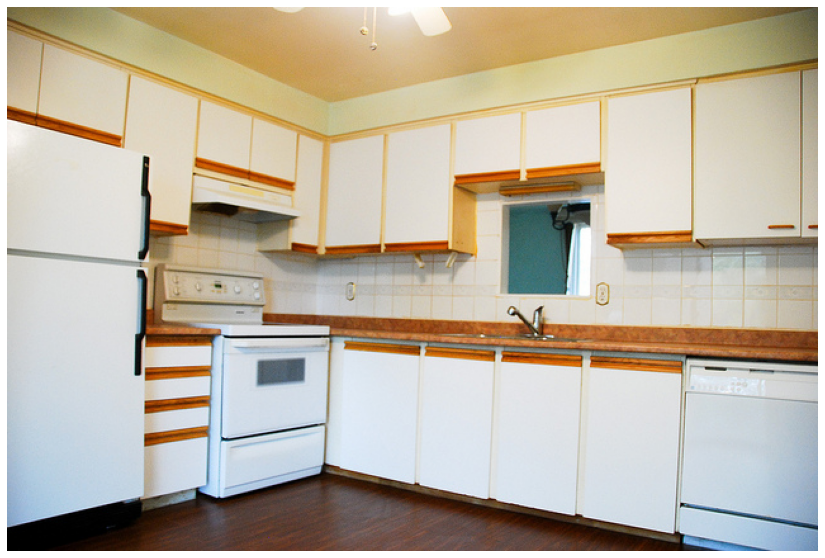

In [122]:
# get all images containing given categories, select one at random
# catIds = coco_data.getCatIds(catNms=['laptop', 'book'])
# imgIds = coco_data.getImgIds(catIds=catIds)

imgIds = coco_data.getImgIds()

# imgIds = coco_data.getImgIds(imgIds = [324158])
img = coco_data.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

I = io.imread(img['coco_url'])
plt.axis('off')
plt.rcParams['figure.figsize'] = [40, 20]
plt.imshow(I)
plt.show()

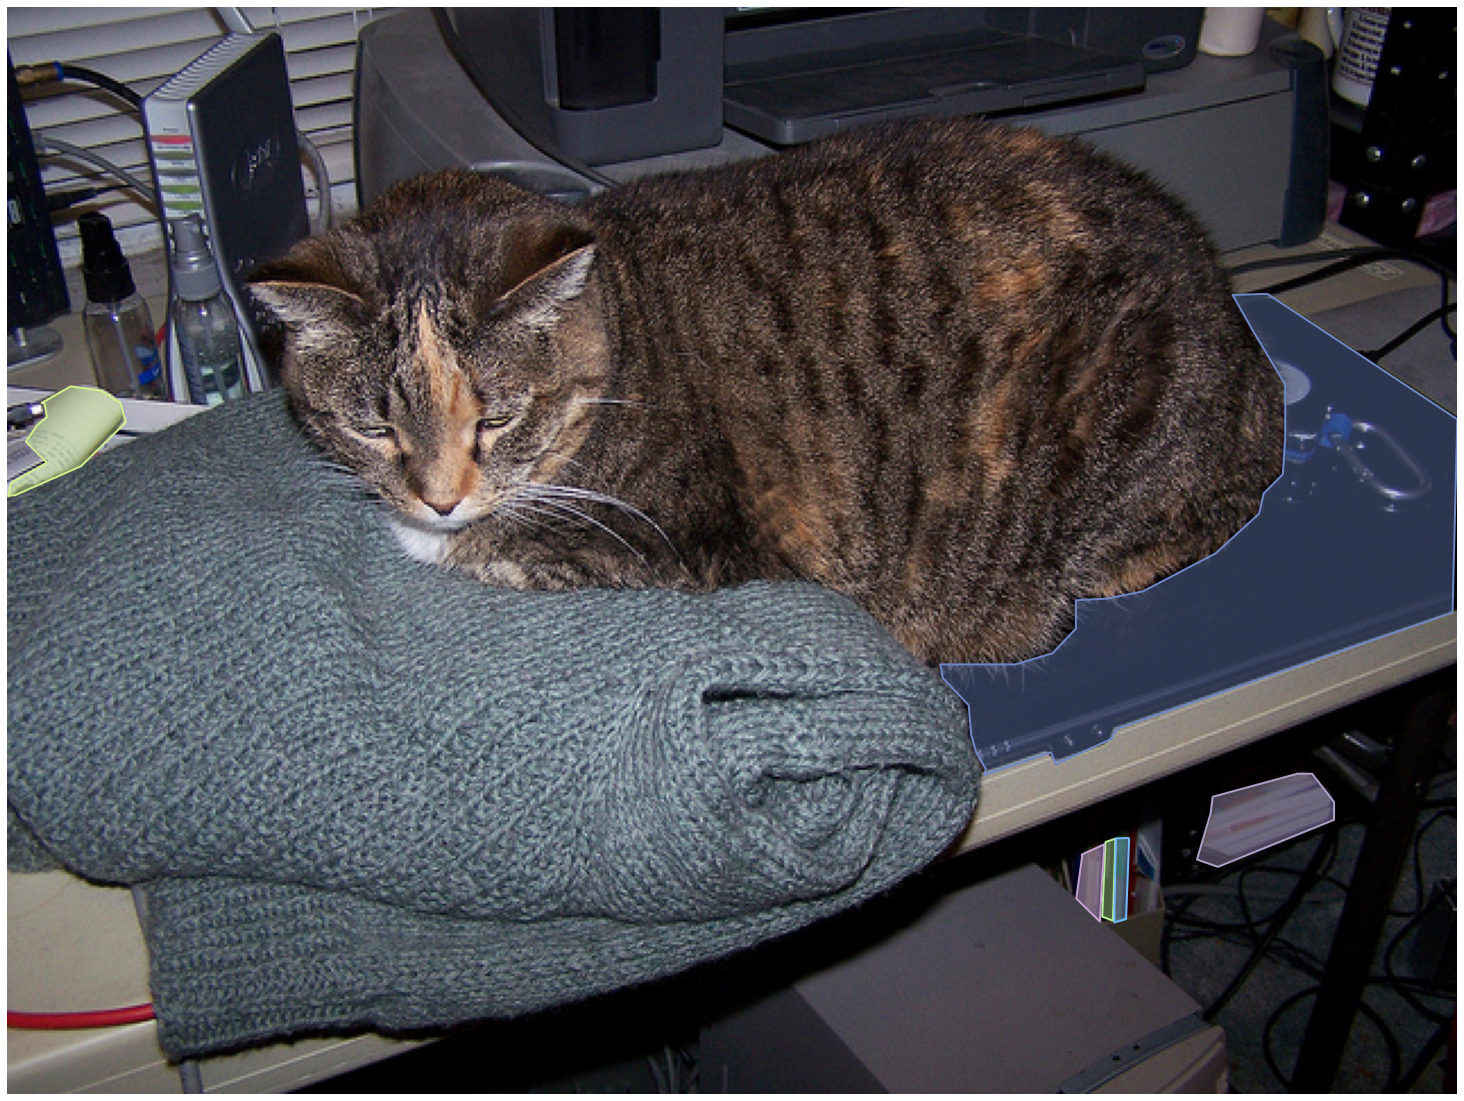

In [33]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco_data.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_data.loadAnns(annIds)
coco_data.showAnns(anns)

In [34]:
def coco_grid_size(img):
    def anns_to_masks(anns):
        masks = {}

        for ann in anns:
            if ann['id'] not in masks:
                masks[ann['id']] = {}

            masks[ann['id']]['mask'] = coco_data.annToMask(ann)

        return masks

    anns = coco_data.loadAnns(coco_data.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None))
    masks = anns_to_masks(anns)
    mask_cover = grid_size(I, masks, 20, 0.1)

    return mask_cover

c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


1
2


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


3


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


4


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


5


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


6
7
8
9
10


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


11


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


12
13


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


14


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


15


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


16


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


17


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


18


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


19
20
21


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


22


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


23


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


24


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


25
26
27
28


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


29


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


30
31
32


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


33


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


34


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


35
36


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


37
38


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


39
40
41


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


42
43


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


44
45
46
47


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


48
49
50


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


51
52
53


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


54
55


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


56
57
58


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


59
60


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


61


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


62


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


63


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


64


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


65


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


66
67


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


68
69


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


70


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


71
72
73
74
75
76
77


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


78


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


79


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


80
81


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


82


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


83
84


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


85
86
87
88


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


89
90


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


91
92


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


93
94


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


95
96


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


97


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


98
99
100


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


101
102
103


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


104
105
106


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


107
108
109
110
111
112


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


113
114


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


115
116
117
118


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


119


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


120


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


121
122
123
124
125
126


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


127
128
129
130
131


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


132


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


133


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


134


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


135
136


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


137


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


138
139
140
141
142
143
144
145


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


146
147
148
149


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


150


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


151


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


152
153
154
155
156
157
158


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


159


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


160
161


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


162


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


163
164


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


165
166


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


167


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


168


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


169
170


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


171
172
173
174
175
176


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


177


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


178


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


179


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


180
181
182
183
184
185
186
187


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


188
189


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


190
191
192
193


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


194


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


195
196
197
198


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


199
200


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


201
202
203


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


204
205
206
207


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


208
209
210


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


211


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


212
213
214
215
216
217


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


218
219
220
221
222
223


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


224
225
226
227
228


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


229
230
231
232
233
234
235
236
237
238
239
240
241


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


242
243
244


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


245
246
247
248
249
250
251


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


252
253


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


254
255
256


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


257


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


258


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


259


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


260


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


261


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


262
263
264


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


265
266


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


267


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


268


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


269
270
271


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


272


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


273
274


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


275


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


276


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


277
278
279
280


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


281
282
283


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


284
285
286


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


287


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


288
289
290
291
292


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


293


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


294
295


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


296
297
298


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


299


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


300
301
302
303
304
305
306
307
308
309
310


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


311
312
313


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


314


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


315
316


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


317
318
319
320
321
322


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


323
324


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


325


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


326


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


327
328
329


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


330
331
332


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


333
334


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


335
336


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


337
338
339
340


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


341


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


342


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


343


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


344


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


345


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


346
347
348
349
350


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


351


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


352


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


353
354
355
356
357
358
359
360
361
362
363


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


364
365
366
367


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


368
369


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


370
371
372
373
374
375
376


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


377


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


378
379
380
381
382
383
384
385
386
387
388
389
390
391
392


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


393
394
395
396


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


397


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


398


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


399
400


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


401


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


402
403
404
405
406
407


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


408


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


409
410
411
412
413
414
415
416


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


417
418
419
420
421
422


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


423
424
425


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


426
427
428
429


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


430


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


431


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


432


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


433
434
435
436
437
438
439
440
441
442


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


443
444
445


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


446
447
448
449
450
451
452
453


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


454


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


455
456
457


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


458


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


459


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


460


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


461
462


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


463


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


464


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


465
466
467
468
469
470
471
472
473
474
475
476
477


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


478
479


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


480
481


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


482


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


483
484
485
486
487
488
489
490
491


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


492


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


493


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


494
495
496
497
498


c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


499


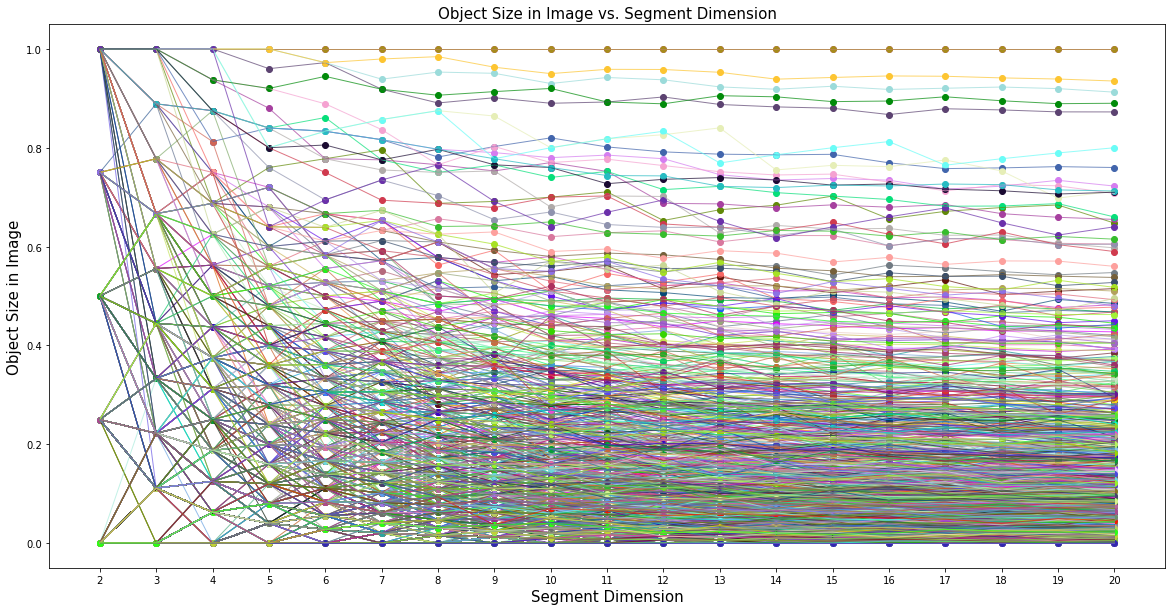

In [123]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.figure()

plt.xlabel('Segment Dimension', fontsize=15)
plt.ylabel('Object Size in Image', fontsize=15)
plt.title('Object Size in Image vs. Segment Dimension', fontsize=15)

imgs = coco_data.loadImgs(imgIds)

mask_cover = []

i = 0
for img in imgs:
    mask_cover.append(coco_grid_size(img))

    i += 1

    if i == 500:
        break

    print(f'{i}')

plt.show()

In [124]:
object_sizes = []

for img in mask_cover:
    for mask in img:
        object_sizes.append(list(img[mask].values()))

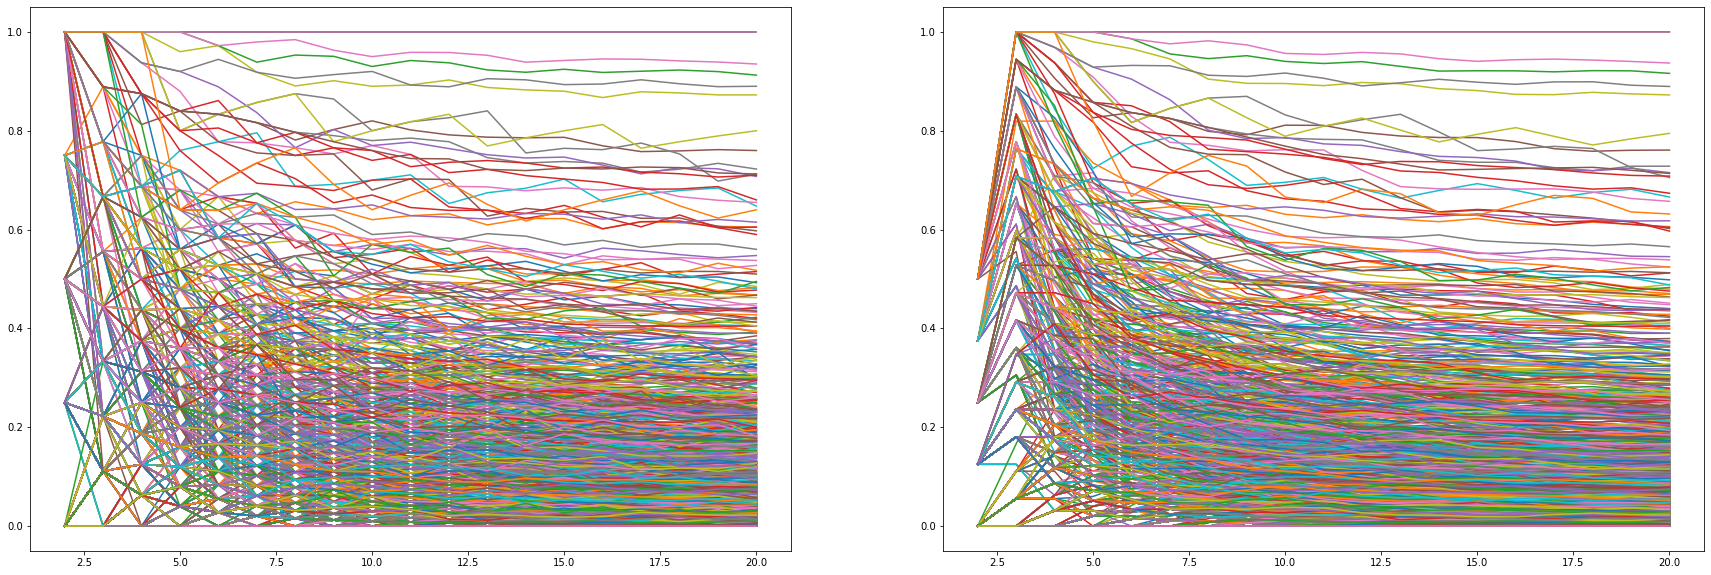

c:\Programming\Python\Environments\anaconda\envs\coco\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


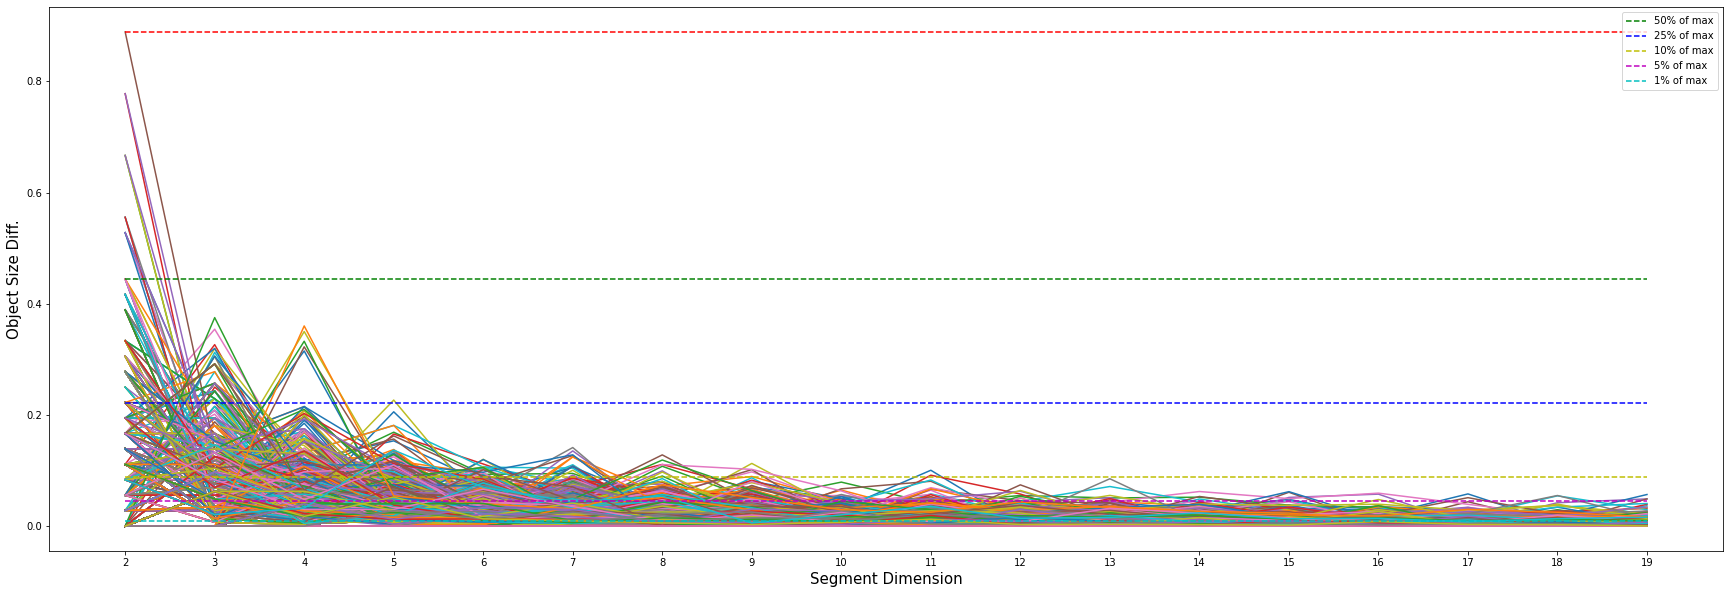

In [125]:
# Moving average
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'same') / w

# Plot moving average
plt.rcParams['figure.figsize'] = (30, 10)
plt.figure()

plt.xlabel('Segment Dimension', fontsize=15)
plt.ylabel('Object Size in Image', fontsize=15)

w = 2

s1 = plt.subplot(121)
s2 = plt.subplot(122)

for i in range(len(object_sizes)):
    s1.plot(np.arange(2, 21), object_sizes[i], label=f'Image {i}')
    s2.plot(np.arange(2, 21), moving_average(object_sizes[i], w), label=f'Image {i}')

# Plot moving average
plt.rcParams['figure.figsize'] = (30, 10)
plt.figure()

plt.xlabel('Segment Dimension', fontsize=15)
plt.ylabel('Object Size Diff.', fontsize=15)

plt.xticks(np.arange(2, 20, 1))

# s2 = plt.subplot(122)

# Plot the difference in value between each point and the one before it
for i in range(len(object_sizes)):
    plt.plot(np.arange(2, 20), np.abs(np.diff(object_sizes[i])))
    # s2.plot(np.arange(2, 20), moving_average(np.abs(np.diff(object_sizes[i])), w))

# Plot horizontal line at the max y value of the moving average
maxs1 = max([max(np.abs(np.diff(object_sizes[i]))) for i in range(len(object_sizes))])
plt.plot(np.arange(2, 20), [maxs1] * 18, 'r--')

# Plot at 50%, 25%, 10%, 5%, and 1% of maxs1
for i, c in zip([0.5, 0.25, 0.1, 0.05, 0.01], ['g', 'b', 'y', 'm', 'c']):
    plt.plot(np.arange(2, 20), [maxs1 * i] * 18, f'{c}--', label=f'{int(i * 100)}% of max')

# maxs2 = max([max(moving_average(np.abs(np.diff(object_sizes[i])), w)) for i in range(len(object_sizes))])
# s2.plot(np.arange(2, 20), [maxs2] * 18, 'r--')

# for i, c in zip([0.5, 0.25, 0.1, 0.05, 0.01], ['g', 'b', 'y', 'm', 'c']):
#     s2.plot(np.arange(2, 20), [maxs2 * i] * 18, f'{c}--')
plt.legend()

**Elbow Method**

In [126]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [127]:
n_clusters_range = np.arange(2, 21)

In [128]:
object_blobs = []

for img in object_sizes:
    for i, size in zip(np.arange(2, 21), img):
        object_blobs.append([i, size])

object_blobs = np.array(object_blobs, dtype=np.float)

In [129]:
object_blobs

array([[ 2.        ,  0.25      ],
       [ 3.        ,  0.33333333],
       [ 4.        ,  0.1875    ],
       ...,
       [18.        ,  0.50925926],
       [19.        ,  0.49584488],
       [20.        ,  0.48      ]])

In [130]:
wcss = []
for n_clusters in n_clusters_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(object_blobs)
    wcss.append(kmeans.inertia_)

In [131]:
wcss

[472636.0917753684,
 209488.26966849915,
 116806.6656683267,
 73775.74110116379,
 50605.606621584266,
 37365.113985631346,
 29090.0489591539,
 20815.040161457364,
 15849.95923983137,
 14194.680037490714,
 12539.577843414228,
 10884.561034141012,
 9229.577474450763,
 7574.5645846288935,
 5919.54798528169,
 4264.535873359285,
 2609.5345393029193,
 954.5337369539063,
 831.7256697125862]

In [132]:
np.diff(wcss)

array([-2.63147822e+05, -9.26816040e+04, -4.30309246e+04, -2.31701345e+04,
       -1.32404926e+04, -8.27506503e+03, -8.27500880e+03, -4.96508092e+03,
       -1.65527920e+03, -1.65510219e+03, -1.65501681e+03, -1.65498356e+03,
       -1.65501289e+03, -1.65501660e+03, -1.65501211e+03, -1.65500133e+03,
       -1.65500080e+03, -1.22808067e+02])

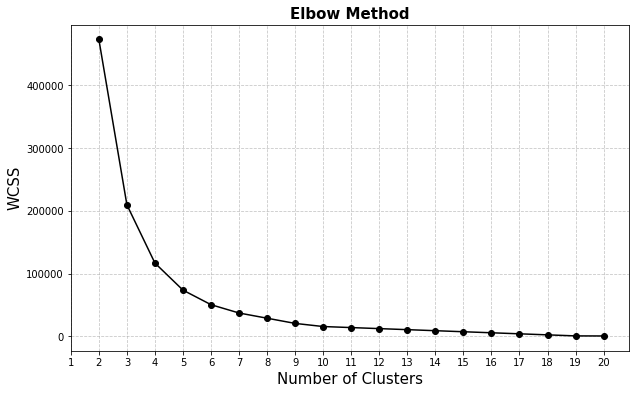

In [133]:
plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, wcss, marker='o', color='k')
plt.title('Elbow Method', fontsize=15, fontweight='bold')
plt.xlabel('Number of Clusters', fontsize=15)
plt.ylabel('WCSS', fontsize=15)
plt.xticks(np.arange(1, 21))
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().patch.set_facecolor('white')  # Set background color to white
plt.show()

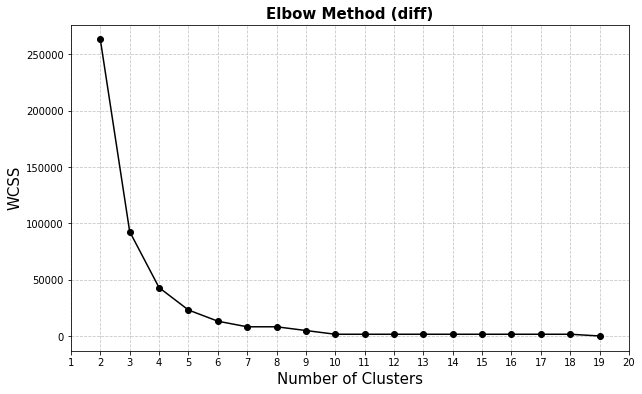

In [134]:
plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range[:-1], np.abs(np.diff(wcss)), marker='o', color='k')
plt.title('Elbow Method (diff)', fontsize=15, fontweight='bold')
plt.xlabel('Number of Clusters', fontsize=15)
plt.ylabel('WCSS', fontsize=15)
plt.xticks(np.arange(1, 21))
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().patch.set_facecolor('white')  # Set background color to white
plt.show()